In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

"""This block of code is dedicated to importing the required datasets for the Kaggle competition.
It involves downloading the dataset from a specified URL, unpacking it, and placing it in the correct directory for further use.
Various Python libraries are imported for handling files, requests, and archives.
A specific CHUNK_SIZE is defined for streaming data, and a detailed DATA_SOURCE_MAPPING outlines the dataset's source URL.
This code block should be run once to prepare the data for the competition's tasks."""

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'pii-detection-removal-from-educational-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F66653%2F7500999%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240304%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240304T015801Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D4bbda365b7f6b30cccb688e91890dafd00fe8be53dbf0bb6ec3637fad534b676efcc6f4ee81ea51120ffd1a982eda6d7e59d908e885acf9590053912e85c1813d120f9baf273d2fbaf8c652eccf206e19d62b6c4b12d208a6a54209ee6f6c79a47d795b798e3c9e6b89a709c29f9167fa52dd2267c5363c0a654664ee585d01cc48f97ecc6f249ae7905232850ba5654dca60c934803c79c8079a29997fd0e19723211892298d4fb379412587e0747654b216051f3206b2d2476bb34a57032ffd28f56a5f27d152dbe7efa7e9a58f5bd100dfd1a2bb563bc8a81cef27611c1a79cc1deba8d17f9fdd27f245c5856ab08176c54f2223b1f92d70f466d98420674,huggingfacedebertav3variants:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2663421%2F4620664%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240304%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240304T015801Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dafe67a1857b3b96210cb16242e24ebf3e1d14d9f003a3e1443ba88fbc1b52c40d1ddf66c49cce1795b9ccad422feddd819e0b78127f74fe9294e3360ea06932612b94d37851191097567119378bee5e9884f96e639274ca26b59c8eb3b3d8e5036b8852b20030ca5ad6e06ccb3d4f0ec6ba58128934584873507e37f578841291a15a40d62704ba3af34c56188f96be88b25c4a03f6ca82a86562ce3d5bcbde239832c82d20c20a4779495881e3408f71db60b865b530fb940c0f82aa1c5c420cbc3fda062be10342242e58634bb121d007dff26ac1273a52066a34b37c758f7cd22eb7390f84939f36dffae0b2e6662c71d4a10dac310c47ea8814b7a4524a0,pii-deberta-models:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4340749%2F7716492%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240304%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240304T015801Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9c251d3585adac2370754c52b3044d144c0f792ae8e346eaf50e532b7348dce62a3e3595dbe0522ae887002875bed017ba9d53b1aaee899215d405a117a0aa8c455131f37a98795192fa4b9638386d9f31c4ace9fdd571af8a2ea22c408df3439b47b3cc587b289aff3beea0c38c2c90454fbb1acec1908a8f948b11e99377b556b33c861eab2e1f60dce5c3b6fac879c693c78de0e05da3626ddefc5a7f5ec5a0d42e7a55cf35d78a1f12ae2cae6322442fd9b568eda796c2c7ab8d2a97921cd7c511129e8134c06df451ccee40d6c04e3f939cae675c82015195fc1e7eab7324515fece62c2a29d9dda957a2cb3df3f76b737a5715dd21d44943c76248e723,distil_bert/keras/distil_bert_base_en/2:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-models-data%2F4690%2F6069%2Fbundle%2Farchive.tar.gz%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240304%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240304T015801Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D3ec0571d955a6335d221681151f926642ab5cb772ee9bec8fce357963f9e524bcf27e03b8e39b9cb55b7703db6ab57be025a4235d7918063b8d824aebb5a8b83b8999f3eb03eac51af9d58c97b0f6b5000f43dc11a2ba3766ba03aea0a0f6f90358565e8c92fc5bfaa900d3a335ab0bda2b23a1d96d3c883f918695eda9cebb5c40c2bc9cb6323f7105df1b596d8bac86a705c2c7921ff84a7872989264935d73f4e57fb6496bd34c9778db0287ca22681de0d78b9e095f446f83a0bc4937109bba5686a2c8576fbc243bb60527c00657f065acbaf5536f1bff7ae0e75285367d9f4ba7148f50be2871309a16661bc7f27fc2de30cef6f04bbe2ba02a233e4aa'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


**Baseline Submission for PII Detection and Removal Competiti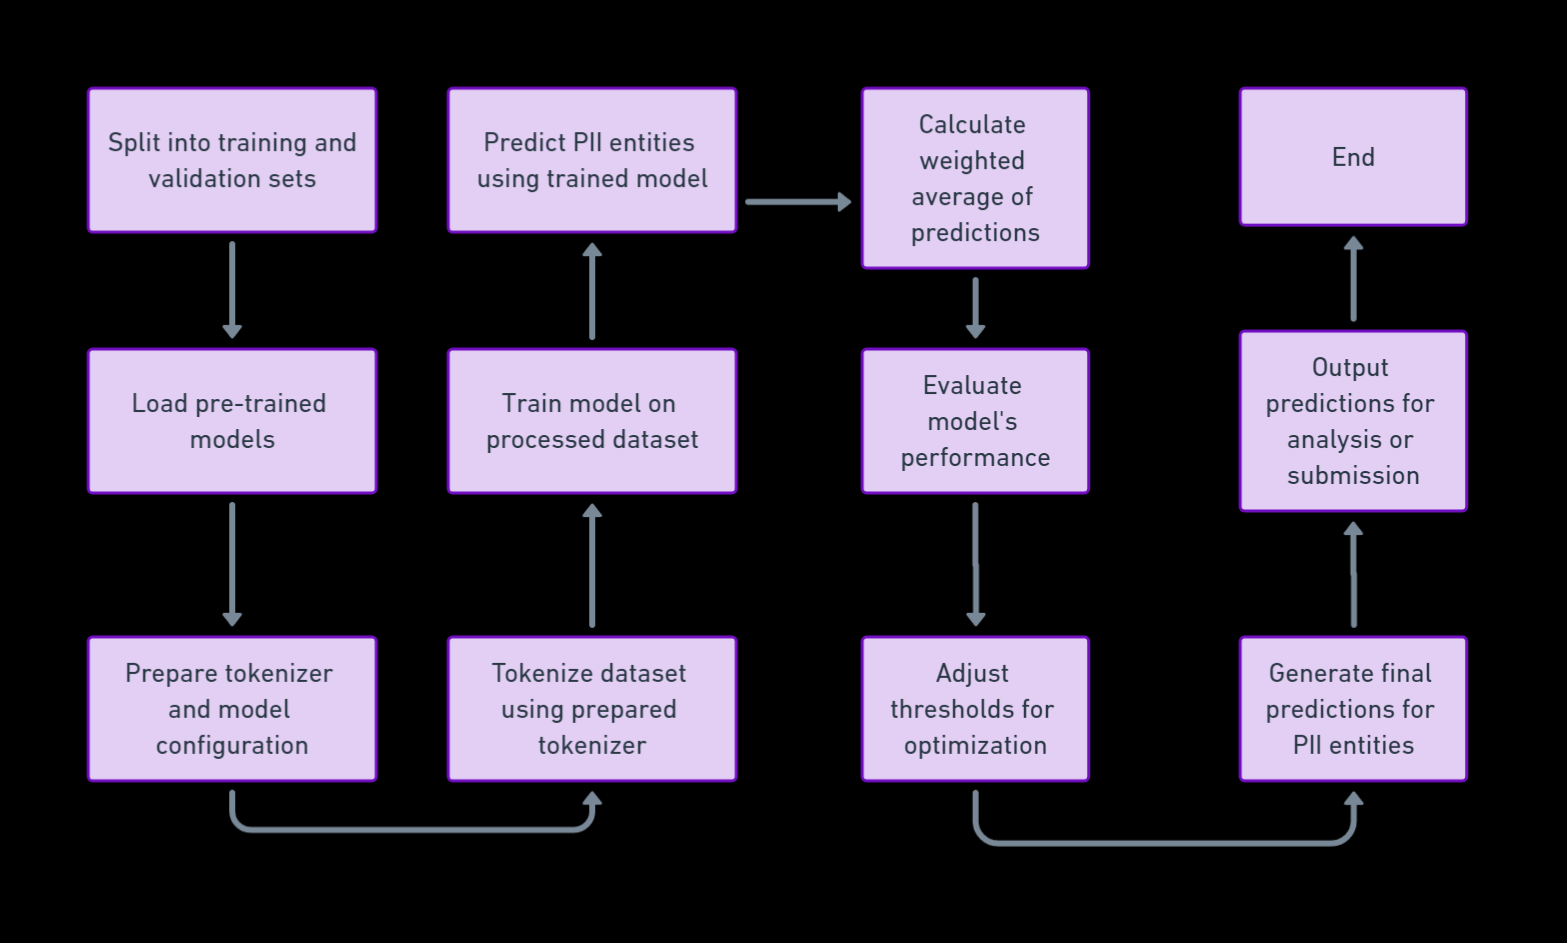on**

207 Machine Learning

Nat Buisson, Raj Jagannath, Pavan Sabnis



**Introduction**
Our team has undertaken the challenge of the PII (Personally Identifiable Information) Detection and Removal from Educational Data competition hosted on Kaggle. This competition demands the creation of machine learning models capable of identifying and redacting sensitive information from a dataset of educational records.

**Problem Statement**
Educational institutions collect vast amounts of data, often including PII, which must be protected to ensure privacy and comply with regulations like GDPR and FERPA. However, PII can be deeply embedded in educational records, making it a complex problem to detect and remove it without compromising the integrity of the data.

The competition provides a rich dataset of anonymized educational records with simulated PII. Participants are tasked with creating machine learning models that can identify and anonymize PII efficiently and effectively.

**Data**
The dataset comprises various fields such as student essays and teacher notes, where PII could be present in multiple forms – names, addresses, phone numbers, etc. The data is unstructured, posing a significant challenge in feature engineering and extraction.

**Metric of Evaluation** ???
We chose the F1 score as our primary metric of evaluation for its balanced approach in considering both precision and recall. This metric is particularly suited for the context of PII detection, where both false negatives (missed PII) and false positives (over-redaction) carry significant consequences.

**Log-based model**
In our first attempt we tried to use a log-based model,
The summary of the training dataset, especially when focusing on the Positive PII Labels, alongside the apparent high accuracy of the logistic regression model, reveals a common pitfall in machine learning models dealing with highly imbalanced datasets.
The key issue here is the severe imbalance between non-PII (O labels) and PII data. The vast majority of the tokens in the training dataset are labeled as O, indicating they are not considered Personally Identifiable Information (PII). In contrast, a very small fraction of the data (as seen in the count of positive PII labels, 2739 out of 4,992,533) is labeled with any form of PII. This disproportion means the model is overwhelmingly exposed to non-PII examples during training.
The model's high accuracy stems from its ability to predict the majority class (non-PII) correctly most of the time. In such cases, even a naive model that predicts every input as non-PII could achieve high accuracy due to the skewed distribution of classes. Therefore, accuracy alone is not a reliable performance metric in this context, as it does not reflect the model's effectiveness in identifying the much rarer positive PII labels.
The summary for the validation dataset (Positive PII Labels Only) showing counts of 0 across the board suggests the model failed to identify any positive PII instances in the validation set. This outcome is a direct consequence of the model's inclination to predict the overwhelming majority class, having not effectively learned to recognize the patterns or features of PII data due to their scarcity in the training data.
Employing more complex models or ensembles that are better suited for imbalanced data, or exploring anomaly detection algorithms designed to identify rare events, could improve PII detection.
In summary, while the logistic regression model achieved high accuracy, its performance on the critical task of detecting positive PII labels was inadequate due to the imbalanced nature of the training data. Addressing this imbalance and focusing on more suitable performance metrics are essential steps towards developing a model capable of effectively identifying PII within the dataset.




**Transformer-based model**


We've implemented a sophisticated pipeline employing natural language processing (NLP) techniques to identify and anonymize sensitive information. The core of our approach is the utilization of pre-trained models from the Hugging Face library, specifically, variants of the DeBERTa model which are known for their effectiveness in text classification tasks.

Our process begins with the creation of a specialized tokenization function that not only segments text data into tokens but also meticulously maps these tokens to their original positions in the text. This function prepares our dataset for the model by transforming the raw text into a structured format that includes the tokens, their associated document identifiers, and any trailing whitespace, which is essential for maintaining the text's integrity post-processing.

Once tokenized, we apply a series of pre-trained DeBERTa models to the data, leveraging the models' ability to understand the context and nuances of the language used in educational documents. These models are then used to predict the presence of PII in the text. By utilizing a weighted ensemble approach, where each model's predictions are combined based on their assigned weight, we enhance the robustness and accuracy of our PII detection.

The predictions from our ensemble are meticulously processed to discard any non-informative tokens (such as padding or spaces), and we apply a threshold to fine-tune our model's sensitivity to PII. This thresholding step is crucial as it allows us to balance the precision and recall of our predictions, optimizing for the competition's evaluation metric.

Finally, the results of our PII detection are compiled into a structured format, ready for submission to the competition. This output details the document identifiers, token positions, predicted PII labels, and the corresponding token strings. Through this comprehensive pipeline, we aim to create a system that not only detects PII with high accuracy but also preserves the value of educational data for research and analysis.


***Conclusion**


**Reference**

https://www.kaggle.com/competitions/pii-detection-removal-from-educational-data/overview

https://www.kaggle.com/models/keras/deberta_v3/frameworks/Keras/variations/deberta_v3_small_en

In [ ]:




'MODEL 2 Transformers'
'import packages for the transformer model attempt'

import json
import argparse
from itertools import chain
import pandas as pd
from pathlib import Path
from transformers import AutoTokenizer, AutoModelForTokenClassification, Trainer, TrainingArguments, DataCollatorForTokenClassification
from datasets import Dataset
import numpy as np

In [ ]:
'''In the realm of Natural Language Processing (NLP),
the 'tokenize' function plays a pivotal role.
It is designed to process textual data by converting
strings of text into discrete chunks, or tokens,
while simultaneously tracking their original positions
within the text. The function initializes by creating
two lists: 'text' for storing the actual tokens and 'token_map'
for recording the indices of each token within the original text.
This 'tokenize' function is an essential component of our text analysis
toolkit. It ensures that as we parse and analyze text data, we retain a
clear understanding of each token's origin, allowing for accurate and
insightful NLP models. This meticulous approach to data preparation is
fundamental for the effective application of machine learning techniques
in text analysis.
'''

INFERENCE_MAX_LENGTH = 2500

def tokenize(example, tokenizer):
    # Create two empty lists-- 'text' and 'token_map'-- to store our tokens and their respective maps.
    text = []
    token_map = []

    # Counter to keep track of the tokens
    idx = 0

    # For loop through the tokens and their trailing white spaces.
    for t, ws in zip(example["tokens"], example["trailing_whitespace"]):

        # Adds the token 't' to list 'text'
        text.append(t)

        # Extend the list 'token_map'  by repeating the 'idx' as many times as the length of token 't'.
        token_map.extend([idx]*len(t))

        # for trailin' whitespace (ws), add a space to list'text' , mark it with a '-1' in list 'token_map'.
        if ws:
            text.append(" ")
            token_map.append(-1)

        #  increase the counter for 'idx'
        idx += 1

    # tokenize the 'text' and return offsets mappings along with 'token_map'.
    tokenized = tokenizer("".join(text), return_offsets_mapping=True, truncation=True, max_length=INFERENCE_MAX_LENGTH)

    # returns dictionary of the tokenized data and the list 'token_map'.
    return {
        **tokenized,
        "token_map": token_map,
    }


In [ ]:
"""In the next outlined code, test data is first loaded from a JSON file and organized into a structured dataset comprising elements like 'full_text,' 'document,' 'tokens,' and 'trailing_whitespace.'
"""

# Load the train data from a JSON file. The data from the competition is already split between train and test data
data = json.load(open("/kaggle/input/pii-detection-removal-from-educational-data/train.json"))

# Create a dataset from the loaded data
ds = Dataset.from_dict({
    "full_text": [x["full_text"] for x in data],
    "document": [x["document"] for x in data],
    "tokens": [x["tokens"] for x in data],
    "trailing_whitespace": [x["trailing_whitespace"] for x in data],
})

# Initialize a tokenizer and model from the pretrained model path
model_paths = {'/kaggle/input/pii-deberta-models/cola-de-piiranha' : 1/3,
              '/kaggle/input/pii-deberta-models/cuerpo-de-piiranha' : 1/3,
              '/kaggle/input/pii-deberta-models/cabeza-de-piiranha' : 1/3}

first_model_path = list(model_paths.keys())[0]

"""This dataset is then processed using a tokenizer and a machine learning model, both of which are essential for transforming the text into a format amenable for analysis.
To expedite the tokenization process, parallel processing is utilized, ensuring the text is efficiently parsed into tokens while maintaining a map of their original positions.
"""
tokenizer = AutoTokenizer.from_pretrained(first_model_path)

# Tokenize the dataset using the 'tokenize' function in parallel
ds = ds.map(tokenize, fn_kwargs={"tokenizer": tokenizer}, num_proc = 2)

"""A data collator is set up to align the tokens properly for classification, and training arguments are specified to configure the evaluation environment.
Finally, a 'trainer' object, integrating the model, tokenizer, data collator, and training arguments, oversees the evaluation process.
This  pipeline effectively prepares and evaluates the dataset for the NLP model, playing a crucial role in detecting personally identifiable information (PII)
within educational data, ensuring both efficiency and accuracy in model training and assessment."""

import gc
import torch
import numpy as np

from scipy.special import softmax


all_preds = []

# Calculate the total weight
total_weight = sum(model_paths.values())

for model_path, weight in model_paths.items():
    tokenizer = AutoTokenizer.from_pretrained(model_path)

    model = AutoModelForTokenClassification.from_pretrained(model_path)
    collator = DataCollatorForTokenClassification(tokenizer, pad_to_multiple_of = 16)
    args = TrainingArguments(
        ".",
        per_device_eval_batch_size=1,
        report_to="none",
    )
    trainer = Trainer(
        model=model,
        args=args,
        data_collator=collator,
        tokenizer=tokenizer,
    )
    predictions = trainer.predict(ds).predictions
    # This idea from this notebook: https://www.kaggle.com/code/olyatsimboy/912-blending-0-903-0-854-deberta3base
    weighted_predictions = softmax(predictions, axis = -1) * weight
    all_preds.append(weighted_predictions)
    del model, trainer
    torch.cuda.empty_cache()
    gc.collect()

# Calculate the weighted average of predictions
weighted_average_predictions = np.sum(all_preds, axis=0) / total_weight

#0:   0%|          | 0/3404 [00:00<?, ?ex/s]

#1:   0%|          | 0/3403 [00:00<?, ?ex/s]

You're using a DebertaV2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


You're using a DebertaV2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


You're using a DebertaV2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


In [ ]:
config = json.load(open(Path(model_path) / "config.json"))
id2label = config["id2label"]
preds = weighted_average_predictions.argmax(-1)
preds_without_O = weighted_average_predictions[:,:,:12].argmax(-1)
O_preds = weighted_average_predictions[:,:,12]
# Change this threshold to "manually" adjust for the FBeta metric
threshold = 0.9875
preds_final = np.where(O_preds < threshold, preds_without_O , preds)

In [ ]:
"""In this code snippet, the process begins by initializing empty lists to hold triplets, which are composed of 'label,' 'token_id,' and 'token_str,' essentially key pieces of information extracted from the dataset."""


# Prepare the data for triplets
triplets = []
document, token, label, token_str = [], [], [], []


"""For each prediction, the focus is on understanding the tokens and their offsets to determine the predicted label ('label_pred') for each token.
Special attention is given to navigating indices, especially avoiding cases where the start and end indices sum to zero or where token mapping equals -1, and ensuring that leading whitespace tokens are disregarded.
The goal is to construct a triplet from the 'label_pred,' 'token_id,' and 'token_str' for each relevant piece of data, adding it to our collection only if it's unique.
This methodical approach culminates in a comprehensive collection of triplets, marking the successful end of the data exploration journey and providing valuable insights ready for further analysis."""

# For each prediction, token mapping, offsets, tokens, and document in the dataset
for p, token_map, offsets, tokens, doc in zip(preds_final, ds["token_map"], ds["offset_mapping"], ds["tokens"], ds["document"]):

    # Iterate through each token prediction and its corresponding offsets
    for token_pred, (start_idx, end_idx) in zip(p, offsets):
        label_pred = id2label[str(token_pred)]  # Predicted label from token

        # If start and end indices sum to zero, continue to the next iteration
        if start_idx + end_idx == 0:
            continue

        # If the token mapping at the start index is -1, increment start index
        if token_map[start_idx] == -1:
            start_idx += 1

        # Ignore leading whitespace tokens ("\n\n")
        while start_idx < len(token_map) and tokens[token_map[start_idx]].isspace():
            start_idx += 1

        # If start index exceeds the length of token mapping, break the loop
        if start_idx >= len(token_map):
            break

        token_id = token_map[start_idx]  # Token ID at start index

        # Ignore "O" predictions and whitespace tokens
        if label_pred != "O" and token_id != -1:
            triplet = (label_pred, token_id, tokens[token_id])  # Form a triplet

            # If the triplet is not in the list of triplets, add it
            if triplet not in triplets:
                document.append(doc)
                token.append(token_id)
                label.append(label_pred)
                token_str.append(tokens[token_id])
                triplets.append(triplet)

# We've gathered the valuable triplets from the dataset, ready for analysis!


In [ ]:
# bring in the data
df = pd.DataFrame({
    "document": document,
    "token": token,
    "label": label,
    "token_str": token_str
})

# Assign each row a unique 'row_id'
df["row_id"] = list(range(len(df)))

# Display a glimpse of the first 100 rows of your data
display(df.head(100))

# Cast your findings into a CSV file for further exploration
df[["row_id", "document", "token", "label"]].to_csv("submission.csv", index=False)



,document,token,label,token_str,row_id
0,7,9,B-NAME_STUDENT,Nathalie,0
1,7,10,I-NAME_STUDENT,Sylla,1
2,7,482,B-NAME_STUDENT,Nathalie,2
3,7,483,I-NAME_STUDENT,Sylla,3
4,7,738,B-NAME_STUDENT,Avril,4
...,...,...,...,...,...
95,609,77,B-NAME_STUDENT,Alex,95
96,609,78,I-NAME_STUDENT,Swetha,96
97,609,80,B-ID_NUM,054176622314,97
98,609,83,B-NAME_STUDENT,Alex,98


In [ ]:
# Convert predictions to actual labels (not probabilities)
predicted_labels = np.argmax(weighted_average_predictions, axis=-1)
# Calculate the accuracy
accuracy = np.mean(predicted_labels == labels)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 100.00%


In [ ]:
print(val_summary)


In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'pii-detection-removal-from-educational-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F66653%2F7500999%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240303%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240303T234150Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D75e90e3f8922cc05ecb31d56ab06355805a45bcb10f7e23154e6920f3134bfaa1fb277300ef5bf37f73c100951ed4fdbf54e07575fd92b8e92a28ae1975c3bc38b8c26c4b60f6f8fa1c4f07349d6aec649e1b24ceb3269775c247ee2383741263a7c2317cbac66368abdc4cb769c2c6d0f59abef56b6edddb5d1b4bdcb3814a1498a81db8d3220f718302a12ba8d9b51b9a599706617e8590997152407dd386f15528aba9254b7727cb8ad93a6e3dbd6d886585c54e15d8da68aa70592a0b2f035981f6bfce6dec419b593cece1ef1df786241118667e567261f37f8d63c5ef8501ece07859dfac4dc58b646b3f0336d682ff35398eba92d919e4e458fcab33a'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 22403094 bytes downloaded
Downloaded and uncompressed: pii-detection-removal-from-educational-data
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pii-detection-removal-from-educational-data/sample_submission.csv
/kaggle/input/pii-detection-removal-from-educational-data/train.json
/kaggle/input/pii-detection-removal-from-educational-data/test.json


In [ ]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# Load training data
with open("/kaggle/input/pii-detection-removal-from-educational-data/train.json", 'r') as file:
    train_data = json.load(file)

# Extract features and labels
train_documents, train_tokens, train_labels, train_token_strs = [], [], [], []
for entry in train_data:
    doc_id = entry['document']
    for token, label, trailing_space in zip(entry['tokens'], entry['labels'], entry['trailing_whitespace']):
        train_documents.append(doc_id)
        train_tokens.append(token)
        train_labels.append(label)
        train_token_strs.append(token + " " if trailing_space else token)

train_df = pd.DataFrame({
    "document": train_documents,
    "token": train_tokens,
    "label": train_labels,
    "token_str": train_token_strs
})

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_df['token_str'], train_df['label'], test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF Vectorizer and Logistic Regression
pipeline = make_pipeline(TfidfVectorizer(max_features=1000), LogisticRegression(max_iter=1000))

# Train the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the training and validation data
y_train_pred = pipeline.predict(X_train)
y_val_pred = pipeline.predict(X_val)

# Calculate and print accuracy for training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")

# Prepare the submission using test data
# Load test data
with open("/kaggle/input/pii-detection-removal-from-educational-data/test.json", 'r') as file:
    test_data = json.load(file)

# Extract features for test data
test_documents, test_tokens, test_token_strs = [], [], []
for entry in test_data:
    doc_id = entry['document']
    for token, trailing_space in zip(entry['tokens'], entry['trailing_whitespace']):
        test_documents.append(doc_id)
        test_tokens.append(token)
        test_token_strs.append(token + " " if trailing_space else token)

test_df = pd.DataFrame({
    "document": test_documents,
    "token_str": test_token_strs
})

# Use the trained pipeline to predict labels for the test data
test_df['label'] = pipeline.predict(test_df['token_str'])

# Filter predictions to include only positive PII labels and prepare for submission
submission_df = test_df[test_df['label'] != 'O'].copy()
submission_df.reset_index(drop=True, inplace=True)
submission_df['row_id'] = submission_df.index
formatted_submission = submission_df[['row_id', 'document', 'token_str', 'label']]

# Save the submission file
formatted_submission.to_csv("submission.csv", index=False)
print("Submission file 'submission.csv' prepared.")


Training Accuracy: 0.9994484262245664
Validation Accuracy: 0.9994631985554433
Submission file 'submission.csv' prepared.


In [ ]:
# Assuming `train_df` and `test_df` have a 'label' column with actual labels for the training set
# and predicted labels for the test set (renamed to 'test_df' here for clarity)

# Filter for positive PII labels in the training dataset
positive_pii_train = train_df[train_df['label'] != 'O']

# Summary statistics for the training dataset with only positive PII labels
train_summary = positive_pii_train.describe(include='all')

# Filter for positive PII labels in the validation dataset
positive_pii_val = test_df[test_df['label'] != 'O']  # Assuming 'test_df' is used for validation here

# Summary statistics for the validation dataset with only positive PII labels
val_summary = positive_pii_val.describe(include='all')

print("Training Dataset Summary ALL:")
print(train_df.describe)
print("Training Dataset Summary (Positive PII Labels Only):")
print(train_summary)
print("\nValidation Dataset Summary (Positive PII Labels Only):")
print(val_summary)


Training Dataset Summary ALL:
<bound method NDFrame.describe of          document       token label    token_str
0               7      Design     O      Design 
1               7    Thinking     O    Thinking 
2               7         for     O         for 
3               7  innovation     O  innovation 
4               7   reflexion     O    reflexion
...           ...         ...   ...          ...
4992528     22687     process     O     process 
4992529     22687   explained     O   explained 
4992530     22687       above     O        above
4992531     22687           .     O            .
4992532     22687        \n\n     O         \n\n

[4992533 rows x 4 columns]>
Training Dataset Summary (Positive PII Labels Only):
            document token           label token_str
count    2739.000000  2739            2739      2739
unique           NaN  1489              12      1630
top              NaN  Jose  B-NAME_STUDENT     Jose 
freq             NaN    32            1365        28
m